# Oklahoma Car Accident Prediction Model
*A machine learning application that may warn drivers of their potential crash risk given certain conditions of the day.*

#### Intro
A car accident is a tragic, sudden and often an unexpected event that can be fatal. In 2018, there were [6.7 million](https://www.statista.com/statistics/192097/number-of-vehicles-involved-in-traffic-crashes-in-the-us/) passenger car accidents in the United States. 36,750 of them involved a fatality. What if we could reduce the number of accidents, saving lives and families from a sudden loss?  

Furthermore, what if we could save time? American society strongly values time. "Time is money" is a common catchphrase used in business. As goal achievement depends on efficient and productive use of time, time is a tool which can be "wasted", "saved", and "used". When a car incident occurs on a major highway, the likelihood is high that numerous employees will consequently be stuck in a traffic jam, wasting time, and ultimately late for work. 

Car accidents are not completely random. They are often the combination of variables such as inclement weather, time of day, or location of the accident, just to name a few. With a large car accident dataset that contained these variables and more, machine learning algorithms may be used to find patterns quickly between these conditions and provide a prediction for when an accident might occur.  

#### Problem Statement

This project aims to create a machine learning application that may warn drivers of their potential crash risk given certain conditions of the day. The objective of this project is to answer the questions: 

* What variables, or conditions, are correlated to the severity of a car accident?  
* What machine learning model will provide the best prediction for probability of crash severity?   

#### Target Audience - Who Benefits from this Project?
This application could provide a daily notification to Oklahoma drivers at risk of an accident, compelling them to adjust their driving route or time of commute, thereby reducing the number of vehicle accidents and saving drivers' lives. 

Furthermore, by reducing accidents, traffic jams caused by accidents would also decrease. This may increase punctuality among employees – something which would benefit businesses, especially those located in congested cities with little-to-no bus or subway transportation infrastructure.   

 

## Data Collection and Understanding
For this project, we require an extensive dataset of vehicle accidents in the Oklahoma. We require attributes such as weather, location, time of day, and road conditions, such that we have a rich set of options to contribute to the model. Most importantly, we we will need an attribute for accident severity to make our dependent, prediction variable.

The dataset used for this project is provided by [US-Accidents: A Countrywide Traffic Accident Dataset](https://smoosavi.org/datasets/us_accidents). It contains information about roughly 3.5 million traffic accidents that occured between February 2016 to June 2020 for 49 states. 

><U>Acknowledgements:</U> <br/>
>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and
>Rajiv Ramnath. “[A Countrywide Traffic Accident Dataset](https://arxiv.org/abs/1906.05409)”, arXiv preprint arXiv:1906.05409 (2019). 

>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “[Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights](https://arxiv.org/abs/1909.09638)” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

#### List of attributes for this project
**Severity of the accident** - a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). <br/>
**Start_Time**- Shows start time of the accident in local time zone.  <br/>
**Street** - Shows the street name in addres field.  <br/>
**Side** - Shows the relative side of the street(Right/Left) in address field. <br/> 
**City** - Shows the city in address field.  <br/>
**Humidity(%)** - Shows the humidity in percentage.  <br/>
**Pressure(in)** Shows the air pressure in inches. <br/>
**Visibility(mi)** - Shows the visibility in miles.  <br/>
**Wind_Direction** - Shows wind direction.  <br/>
**Wind_Speed** - Shows wind speed in miles per hour. <br/>
**Weather_Condition** - Shows the weather conidtion in rain, snow, thunderstorm, fog, etc.  <br/>
**Crossing** - A POI annotation which indicates presence of crossing in a nearby location. <br/>
**Give_Way** - A POI annotation which indicates presence of crossing in a nearby location. <br/>
**Junction** - A POI annotation which indicates presence of junction in a nearby location. <br/>
**Railway** - A POI annotation which indicates presence of railway in a nearby location. <br/>
**Stop** - A POI annotation which indicates presence of stop in a nearby location. <br/>
**Sunrise_Sunset** - Shows the period of day (i.e. day or night) based on sunrise/sunset.

#### Using SQLite3 to load dataset <br/>
The size of this dataset is 1.23 Gigabytes, which is too large to load normally into Python environment for data analysis like Jupyter Notebooks. Instead, we use SQLite3 database to load and read the file (Python's build-in lightweight, file-based database). To do this we: 

1. First we build the SQLite database using the 'create_engine' function from SQLAlchemy library.  
2. Then we load the csv file into the database by breaking it down into smaller chunks, and using iterations to append each chunk.  
3. Finally, we use a SQL query to extract our data into a pandas dataframe, filtering out unnecessary attributes and filtering for only accidents occuring in Oklahoma.

In [1]:
# IMPORT PACKAGES AND MODULES
import numpy as np
import pandas as pd

import sqlite3
from sqlalchemy import create_engine

You should consider upgrading via the 'c:\users\eolst_000\pyver\py383\python.exe -m pip install --upgrade pip' command.


In [2]:
# SET DIRECTORY TO THE FILE
DIR = './LocalBigFiles'
FILE = '/US_Accidents_June20.csv'

file = '{}{}'.format(DIR, FILE)

print('File Directory:{}'.format(file))

File Directory:./LocalBigFiles/US_Accidents_June20.csv


In [3]:
# READ FIRST TWO ROWS
print(pd.read_csv(file, nrows=2))

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  

[2 rows x 49 columns]


In [4]:
# CREATE A CONNECTOR TO A SQLITE DATABASE
csv_database=create_engine('sqlite:///csv_database.db')

In [5]:
# USE ITERATION TO BUILD YOUR DATABASE BY LOADING THE FILE BY DEFINED CHUNKSIZE
chunksize=10000
i=0
j=0

for df in pd.read_csv(file, chunksize=chunksize, iterator=True):
    df= df.rename(columns= {c :c.replace(' ','') for c in df.columns}) # THIS REMOVES SPACES IN COLUMN NAMES, BETTER FOR SQL
    df.index+= j
    
    df.to_sql('data_use', csv_database, if_exists= 'append')
    j=df.index[-1]+1 # INDEXING THE POSITION FOR EACH NEW CHUNK(EACH NEW INTERATION)
    
    print('| index:{}'.format(j))

| index:10000
| index:30000
| index:60000
| index:100000
| index:150000
| index:210000
| index:280000
| index:360000
| index:450000
| index:550000
| index:660000
| index:780000
| index:910000
| index:1050000
| index:1200000
| index:1360000
| index:1530000
| index:1710000
| index:1900000
| index:2100000
| index:2310000
| index:2530000
| index:2760000
| index:3000000
| index:3250000
| index:3510000
| index:3780000
| index:4060000
| index:4350000
| index:4650000
| index:4960000
| index:5280000
| index:5610000
| index:5950000
| index:6300000
| index:6660000
| index:7030000
| index:7410000
| index:7800000
| index:8200000
| index:8610000
| index:9030000
| index:9460000
| index:9900000
| index:10350000
| index:10810000
| index:11280000
| index:11760000
| index:12250000
| index:12750000
| index:13260000
| index:13780000
| index:14310000
| index:14850000
| index:15400000
| index:15960000
| index:16530000
| index:17110000
| index:17700000
| index:18300000
| index:18910000
| index:19530000
| inde

In [6]:
# READ THE QUERY INTO A PANDAS DATAFRAME, FILTERING BY STATE = OKLAHOMA
df=pd.read_sql_query('SELECT "Severity","Start_Time","Street","Side","City","Temperature(F)","Humidity(%)","Visibility(mi)","Wind_Direction","Wind_Speed(mph)","Weather_Condition","Crossing","Give_Way","Junction","Railway","Stop","Sunrise_Sunset" FROM data_use WHERE "State"="OK"', csv_database)

In [7]:
df.head()

,Severity,Start_Time,Street,Side,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Give_Way,Junction,Railway,Stop,Turning_Loop,Sunrise_Sunset
0,2,2020-05-24 10:14:59,S Anderson Rd,L,Oklahoma City,71.0,76.0,10.0,S,14.0,Fair,0,0,0,0,0,0,Day
1,2,2020-05-24 12:33:40,I-44 E,R,Oklahoma City,81.0,65.0,10.0,S,21.0,Partly Cloudy / Windy,0,0,0,0,0,0,Day
2,2,2020-05-24 14:13:47,W I 240 Service Rd,L,Oklahoma City,82.0,67.0,10.0,S,22.0,Cloudy / Windy,0,0,0,0,0,0,Day
3,2,2020-05-24 14:57:10,I-44 E,R,Oklahoma City,84.0,61.0,10.0,S,16.0,Mostly Cloudy,0,0,0,0,0,0,Day
4,2,2020-05-24 15:06:06,NW Expressway,R,Oklahoma City,84.0,61.0,10.0,S,16.0,Mostly Cloudy,0,0,0,0,0,0,Day


In [8]:
df.shape

(366446, 18)

In [9]:
# SAVE TO CSV FILE
df.to_csv('crash_data_OK.csv')

# Data
Now that we have a dataset that is significantly smaller(28.1 MG), we can read the data into a pandas dataframe and begin working with it. 

In [10]:
# IMPORT LIBRARIES FOR DATA EXPLORATION

import matplotlib.pyplot as plt # interactive 2D and 3D plots. pyplot function makes some change to a figure 
import pylab as pl # procedural interface to Matplotlib where figures and axes are implicitly and automatically created to achieve the desired plot 
import seaborn as sns
%matplotlib inline 

In [59]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df=pd.read_csv('crash_data_OK.csv', na_values=missing_value_formats)
df.head()

,Unnamed: 0,Severity,Start_Time,Street,Side,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Crossing,Give_Way,Junction,Railway,Stop,Turning_Loop,Sunrise_Sunset
0,0,2,2020-05-24 10:14:59,S Anderson Rd,L,Oklahoma City,71.0,76.0,10.0,S,14.0,Fair,0,0,0,0,0,0,Day
1,1,2,2020-05-24 12:33:40,I-44 E,R,Oklahoma City,81.0,65.0,10.0,S,21.0,Partly Cloudy / Windy,0,0,0,0,0,0,Day
2,2,2,2020-05-24 14:13:47,W I 240 Service Rd,L,Oklahoma City,82.0,67.0,10.0,S,22.0,Cloudy / Windy,0,0,0,0,0,0,Day
3,3,2,2020-05-24 14:57:10,I-44 E,R,Oklahoma City,84.0,61.0,10.0,S,16.0,Mostly Cloudy,0,0,0,0,0,0,Day
4,4,2,2020-05-24 15:06:06,NW Expressway,R,Oklahoma City,84.0,61.0,10.0,S,16.0,Mostly Cloudy,0,0,0,0,0,0,Day


In [60]:
# RENAME COLUMN HEADERS FOR SIMPLICITY
df.rename(columns={"Temperature(F)":"Temperature","Humidity(%)":"Humidity","Wind_Speed(mph)":"Wind_Speed","Visibility(mi)":"Visibility"}, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366446 entries, 0 to 366445
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         366446 non-null  int64  
 1   Severity           366446 non-null  int64  
 2   Start_Time         366446 non-null  object 
 3   Street             366446 non-null  object 
 4   Side               366446 non-null  object 
 5   City               366446 non-null  object 
 6   Temperature        362677 non-null  float64
 7   Humidity           362635 non-null  float64
 8   Visibility         362321 non-null  float64
 9   Wind_Direction     362366 non-null  object 
 10  Wind_Speed         348074 non-null  float64
 11  Weather_Condition  362292 non-null  object 
 12  Crossing           366446 non-null  int64  
 13  Give_Way           366446 non-null  int64  
 14  Junction           366446 non-null  int64  
 15  Railway            366446 non-null  int64  
 16  St

We see two things so far: 
1. We have a few variables with numerous missing values
2. We'll need to change some attribute types from float to integer for scatter plots
3. We have an attribute 'Unnamed: 0' that is unnecessary. We need to drop this.

In [62]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Dealing with Missing Values

In [63]:
# lET'S COUNT THE MISSING VALUES.
print(df.isnull().sum())

Severity                 0
Start_Time               0
Street                   0
Side                     0
City                     0
Temperature           3769
Humidity              3811
Visibility            4125
Wind_Direction        4080
Wind_Speed           18372
Weather_Condition     4154
Crossing                 0
Give_Way                 0
Junction                 0
Railway                  0
Stop                     0
Turning_Loop             0
Sunrise_Sunset           0
dtype: int64


#### Replacing missing data summary

Replace by the mode:

* Visibility: 3441 missing.
* Wind_Direction: 3406 missing.
* Weather_Condition: 3465 missing.

Interpolate the missing values using Linear Interpolation method:
* Temperature: 3144 missing.
* Wind_Speed:  15316 missing.
* Humidity: 3179 missing.

### Temperature, Wind_Speed, Humidity: Replace NaN using Linear Interpolation

In [64]:
df['Temperature'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [65]:
df['Wind_Speed'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [66]:
df['Humidity'].interpolate(method='linear', direction = 'forward', inplace=True) 

### Visibility: Replace NaN with Mode

In [67]:
# Display all values and which is the most common
df['Visibility'].value_counts()

10.00    315806
9.00       6367
7.00       5671
8.00       5083
5.00       5083
6.00       4573
3.00       4502
4.00       4037
2.00       3034
1.00       2147
2.50       1230
0.20       1122
0.50        756
1.50        696
0.80        516
1.80        474
1.20        414
0.75        253
0.25        243
0.10         60
0.40         48
2.20         36
0.90         30
2.80         30
1.90         24
0.60         12
0.12         12
1.40         12
0.63          7
13.00         7
1.60          6
5.50          6
1.10          6
3.50          6
0.88          6
0.00          6
Name: Visibility, dtype: int64

In [68]:
# Replace missing values with the most common: 10.00
df["Visibility"].replace(np.nan, "10.00", inplace=True)

### Wind_Direction: Replace NaN with Mode

In [69]:
# Display all values and which is the most common
df['Wind_Direction'].value_counts()

South       49548
S           40130
SSE         34450
North       29712
SSW         26698
NNW         19621
NNE         17678
N           16086
SE          15599
Calm        13644
NE          11844
NW          10809
ESE          9876
ENE          9868
SW           9221
CALM         7517
East         6828
WNW          6460
Variable     5850
E            5285
WSW          4869
VAR          4427
West         3732
W            2614
Name: Wind_Direction, dtype: int64

In [70]:
# Replace missing values with the most common value: South
df["Wind_Direction"].replace(np.nan, "South", inplace=True)

### Weather_Condition: Replace NaN with Mode

In [71]:
df['Weather_Condition'].value_counts()

Clear                 88002
Fair                  72271
Mostly Cloudy         44982
Overcast              39372
Partly Cloudy         33825
                      ...  
Tornado                   6
Smoke                     6
Light Ice Pellets         6
Shallow Fog               6
Light Rain Showers        6
Name: Weather_Condition, Length: 63, dtype: int64

In [72]:
df["Weather_Condition"].replace(np.nan, "Clear", inplace=True)

In [73]:
# Check that we have no missing values
print(df.isnull().sum())

Severity             0
Start_Time           0
Street               0
Side                 0
City                 0
Temperature          0
Humidity             0
Visibility           0
Wind_Direction       0
Wind_Speed           0
Weather_Condition    0
Crossing             0
Give_Way             0
Junction             0
Railway              0
Stop                 0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64


# Data Normalization

### Remove decimals from attributes: Visibility, Humidity, Temperature, Wind_Speed
* First, change data type to float
* Second, round up all values

In [74]:
df['Visibility']=df['Visibility'].astype(float)
df['Visibility']=df['Visibility'].apply(np.ceil) 

In [75]:
df['Humidity']=df['Humidity'].astype(float)
df['Humidity']=df['Humidity'].apply(np.ceil) 

In [76]:
df['Temperature']=df['Temperature'].astype(float)
df['Temperature']=df['Temperature'].apply(np.ceil) 

In [77]:
df['Wind_Speed']=df['Wind_Speed'].astype(float)
df['Wind_Speed']=df['Wind_Speed'].apply(np.ceil) 

### Categorize duplicate values with different names for: Wind_Direction and Weather_Conditions

In [78]:
df['Wind_Direction'].value_counts()

South       53628
S           40130
SSE         34450
North       29712
SSW         26698
NNW         19621
NNE         17678
N           16086
SE          15599
Calm        13644
NE          11844
NW          10809
ESE          9876
ENE          9868
SW           9221
CALM         7517
East         6828
WNW          6460
Variable     5850
E            5285
WSW          4869
VAR          4427
West         3732
W            2614
Name: Wind_Direction, dtype: int64

In [79]:
df["Wind_Direction"].replace('S', 'South', inplace=True)
df["Wind_Direction"].replace('N', 'North', inplace=True)
df["Wind_Direction"].replace('E', 'East', inplace=True)
df["Wind_Direction"].replace('W', 'West', inplace=True)
df["Wind_Direction"].replace('CALM', 'Calm', inplace=True)
df["Wind_Direction"].replace('VAR', 'Variable', inplace=True)

### Weather_ Conditions

In [80]:
df.Weather_Condition.unique()

array(['Fair', 'Partly Cloudy / Windy', 'Cloudy / Windy', 'Mostly Cloudy',
       'Partly Cloudy', 'Cloudy', 'Light Rain', 'Rain', 'Heavy Rain',
       'Light Drizzle', 'Clear', 'Fog', 'Fair / Windy',
       'Mostly Cloudy / Windy', 'Haze', 'T-Storm',
       'Thunder in the Vicinity', 'Thunder', 'Light Rain with Thunder',
       'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Light Rain / Windy',
       'Blowing Dust', 'Blowing Dust / Windy', 'Squalls / Windy',
       'Drizzle and Fog', 'Wintry Mix / Windy', 'Light Snow',
       'N/A Precipitation', 'Wintry Mix', 'Patches of Fog',
       'Light Snow / Windy', 'Light Drizzle / Windy', 'Fog / Windy',
       'Snow', 'Rain / Windy', 'Light Freezing Drizzle', 'Haze / Windy',
       'Heavy Rain / Windy', 'Drizzle / Windy', 'T-Storm / Windy',
       'Thunder / Windy', 'Tornado', 'Overcast', 'Scattered Clouds',
       'Drizzle', 'Heavy Thunderstorms and Rain',
       'Light Thunderstorms and Rain', 'Mist', 'Light Freezing Fog',
       'Light Freezi

In [81]:
df["Weather_Condition"].replace('Fair', 'Clear', inplace=True)
df["Weather_Condition"].replace('Fair / Windy', 'Clear', inplace=True)

df["Weather_Condition"].replace('Overcast', 'Cloudy', inplace=True)
df["Weather_Condition"].replace('Cloudy / Windy', 'Cloudy', inplace=True)
df["Weather_Condition"].replace('Mostly Cloudy', 'Cloudy', inplace=True)
df["Weather_Condition"].replace('Scattered Clouds', 'Cloudy', inplace=True)
df["Weather_Condition"].replace('Mostly Cloudy / Windy', 'Cloudy', inplace=True)

df["Weather_Condition"].replace('Patches of Fog', 'Fog', inplace=True)
df["Weather_Condition"].replace('Fog / Windy', 'Fog', inplace=True)
df["Weather_Condition"].replace('Light Freezing Fog', 'Fog', inplace=True)
df["Weather_Condition"].replace('Shallow Fog', 'Fog', inplace=True)

df["Weather_Condition"].replace('Smoke', 'Haze', inplace=True)
df["Weather_Condition"].replace('Volcanic Ash', 'Haze', inplace=True)
df["Weather_Condition"].replace('Blowing Dust / Windy', 'Haze', inplace=True)
df["Weather_Condition"].replace('Blowing Dust', 'Haze', inplace=True)
df["Weather_Condition"].replace('Haze / Windy', 'Haze', inplace=True)

df["Weather_Condition"].replace('Heavy Drizzle', 'Heavy Rain', inplace=True)
df["Weather_Condition"].replace('Heavy Rain / Windy', 'Heavy Rain', inplace=True)

df["Weather_Condition"].replace('Heavy T-Storm / Windy', 'Heavy Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Heavy Thunderstorms with Small Hail', 'Heavy Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Heavy Thunderstorms and Rain', 'Heavy Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Heavy T-Storm', 'Heavy Thunderstorm', inplace=True)

df["Weather_Condition"].replace('Ice Pellets', 'Ice', inplace=True)
df["Weather_Condition"].replace('Light Ice Pellets', 'Ice', inplace=True)

df["Weather_Condition"].replace('Drizzle', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Rain / Windy', 'Rain', inplace=True)
df["Weather_Condition"].replace('Light Rain / Windy', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Light Freezing Drizzle', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Light Drizzle / Windy', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Drizzle / Windy', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Light Rain Showers', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Rain', 'Rain', inplace=True)
df["Weather_Condition"].replace('Light Freezing Rain', 'Freezing Rain', inplace=True)
df["Weather_Condition"].replace('Drizzle and Fog', 'Light Rain', inplace=True)
df["Weather_Condition"].replace('Light Drizzle', 'Light Rain', inplace=True)

df["Weather_Condition"].replace('Partly Cloudy / Windy', 'Partly Cloudy', inplace=True)

df["Weather_Condition"].replace('Wintry Mix / Windy', 'Snow', inplace=True)
df["Weather_Condition"].replace('Wintry Mix', 'Snow', inplace=True)
df["Weather_Condition"].replace('Light Snow / Windy', 'Light Snow', inplace=True)

df["Weather_Condition"].replace('Squalls / Windy', 'Squalls', inplace=True)

df["Weather_Condition"].replace('Thunder in the Vicinity', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('T-Storm / Windy', 'Thunderstorm', inplace=True)
df["Weather_Condition"].replace('T-Storm', 'Thunderstorm', inplace=True)


df["Weather_Condition"].replace('Light Thunderstorms and Rain', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Thunder', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Light Rain with Thunder', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Thunder / Windy', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Thunderstorms and Rain', 'Light Thunderstorm', inplace=True)
df["Weather_Condition"].replace('Light Thunderstorms and Rain', 'Light Thunderstorm', inplace=True)


df["Weather_Condition"].replace('Fair', 'Clear', inplace=True)
df.drop(df.loc[df['Weather_Condition'] =='N/A Precipitation'].index, inplace=True)

In [82]:
df.Weather_Condition.unique()

array(['Clear', 'Partly Cloudy', 'Cloudy', 'Light Rain', 'Rain',
       'Heavy Rain', 'Fog', 'Haze', 'Thunderstorm', 'Light Thunderstorm',
       'Heavy Thunderstorm', 'Squalls', 'Snow', 'Light Snow', 'Tornado',
       'Mist', 'Freezing Rain', 'Ice', 'Heavy Snow'], dtype=object)

###  Make Dummy Variables for: Sunrise_Sunset and Side

In [83]:
dummy_variable_1=pd.get_dummies(df['Sunrise_Sunset'])
dummy_variable_1.head()

,Day,Night
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [84]:
df=pd.concat([df, dummy_variable_1], axis=1)
df.drop('Sunrise_Sunset', axis=1, inplace=True)

In [85]:
dummy_variable_2=pd.get_dummies(df['Side'])
dummy_variable_2.head()

,L,R
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [86]:
df=pd.concat([df, dummy_variable_2], axis=1)
df.drop('Side', axis=1, inplace=True)

In [87]:
df.head()

,Severity,Start_Time,Street,City,Temperature,Humidity,Visibility,Wind_Direction,Wind_Speed,Weather_Condition,Crossing,Give_Way,Junction,Railway,Stop,Turning_Loop,Day,Night,L,R
0,2,2020-05-24 10:14:59,S Anderson Rd,Oklahoma City,71.0,76.0,10.0,South,14.0,Clear,0,0,0,0,0,0,1,0,1,0
1,2,2020-05-24 12:33:40,I-44 E,Oklahoma City,81.0,65.0,10.0,South,21.0,Partly Cloudy,0,0,0,0,0,0,1,0,0,1
2,2,2020-05-24 14:13:47,W I 240 Service Rd,Oklahoma City,82.0,67.0,10.0,South,22.0,Cloudy,0,0,0,0,0,0,1,0,1,0
3,2,2020-05-24 14:57:10,I-44 E,Oklahoma City,84.0,61.0,10.0,South,16.0,Cloudy,0,0,0,0,0,0,1,0,0,1
4,2,2020-05-24 15:06:06,NW Expressway,Oklahoma City,84.0,61.0,10.0,South,16.0,Cloudy,0,0,0,0,0,0,1,0,0,1


### Break Start_Time into Weekday, Month, and Year

In [88]:
df['Date'] = pd.to_datetime(df['Start_Time']).dt.date
df['Time'] = pd.to_datetime(df['Start_Time']).dt.time

df.drop(['Start_Time'], axis=1, inplace=True)

df['Weekday']=pd.DatetimeIndex(df['Date']).weekday
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year

df.head(10)

,Severity,Street,City,Temperature,Humidity,Visibility,Wind_Direction,Wind_Speed,Weather_Condition,Crossing,...,Turning_Loop,Day,Night,L,R,Date,Time,Weekday,Month,Year
0,2,S Anderson Rd,Oklahoma City,71.0,76.0,10.0,South,14.0,Clear,0,...,0,1,0,1,0,2020-05-24,10:14:59,6,5,2020
1,2,I-44 E,Oklahoma City,81.0,65.0,10.0,South,21.0,Partly Cloudy,0,...,0,1,0,0,1,2020-05-24,12:33:40,6,5,2020
2,2,W I 240 Service Rd,Oklahoma City,82.0,67.0,10.0,South,22.0,Cloudy,0,...,0,1,0,1,0,2020-05-24,14:13:47,6,5,2020
3,2,I-44 E,Oklahoma City,84.0,61.0,10.0,South,16.0,Cloudy,0,...,0,1,0,0,1,2020-05-24,14:57:10,6,5,2020
4,2,NW Expressway,Oklahoma City,84.0,61.0,10.0,South,16.0,Cloudy,0,...,0,1,0,0,1,2020-05-24,15:06:06,6,5,2020
5,3,I-240 W,Oklahoma City,83.0,63.0,10.0,SSE,20.0,Cloudy,0,...,0,1,0,0,1,2020-05-24,16:46:57,6,5,2020
6,2,W I 240 Service Rd,Oklahoma City,83.0,65.0,10.0,SSE,16.0,Cloudy,0,...,0,1,0,0,1,2020-05-24,17:53:00,6,5,2020
7,2,E 61st St,Tulsa,81.0,69.0,10.0,South,14.0,Partly Cloudy,0,...,0,0,1,0,1,2020-05-24,21:14:18,6,5,2020
8,2,Life Style Dr,Oklahoma City,67.0,76.0,10.0,East,10.0,Clear,0,...,0,0,1,0,1,2020-05-25,04:17:41,0,5,2020
9,2,S Rockwell Ave,Oklahoma City,66.0,81.0,10.0,South,8.0,Cloudy,0,...,0,0,1,1,0,2020-05-25,06:11:35,0,5,2020


# Data Exploration

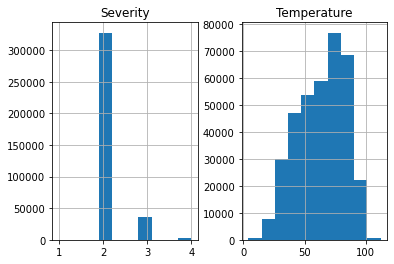

In [89]:
viz= df[['Severity','Temperature']] 
viz.hist()
plt.show()

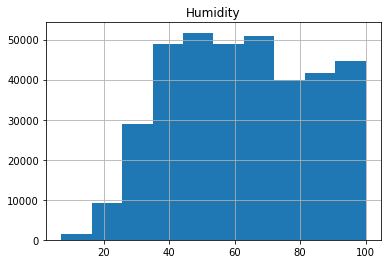

In [90]:
viz= df[['Humidity']] 
viz.hist()
plt.show()

In [91]:
df.corr()

,Severity,Temperature,Humidity,Visibility,Wind_Speed,Crossing,Give_Way,Junction,Railway,Stop,Turning_Loop,Day,Night,L,R,Weekday,Month,Year
Severity,1.000000,-0.013942,0.045288,-0.027630,0.000918,-0.149381,0.017080,0.109084,-0.019532,-0.085353,NaN,-0.020731,0.020731,-0.174924,0.174924,0.041317,-0.007017,-0.015602
Temperature,-0.013942,1.000000,-0.293357,0.222713,0.090254,0.045825,-0.007408,0.005799,0.001134,0.011191,NaN,0.293267,-0.293267,0.022965,-0.022965,-0.000029,0.152362,-0.029276
Humidity,0.045288,-0.293357,1.000000,-0.469409,-0.159798,-0.057493,0.011903,0.020035,0.009761,0.000124,NaN,-0.217455,0.217455,-0.028022,0.028022,0.000073,0.026239,0.030690
Visibility,-0.027630,0.222713,-0.469409,1.000000,0.029796,0.035137,-0.007290,-0.021716,-0.003535,0.005693,NaN,0.052114,-0.052114,0.021695,-0.021695,-0.008850,0.055395,-0.028973
Wind_Speed,0.000918,0.090254,-0.159798,0.029796,1.000000,-0.000736,-0.018981,-0.005432,0.000602,-0.018148,NaN,0.129333,-0.129333,0.015199,-0.015199,0.039870,-0.094455,-0.006570
Crossing,-0.149381,0.045825,-0.057493,0.035137,-0.000736,1.000000,0.003826,-0.088052,0.136869,-0.043682,NaN,0.046586,-0.046586,0.099768,-0.099768,-0.015135,-0.006396,0.031044
Give_Way,0.017080,-0.007408,0.011903,-0.007290,-0.018981,0.003826,1.000000,0.041363,-0.003211,0.016871,NaN,-0.002200,0.002200,-0.027532,0.027532,-0.001128,-0.011955,0.009953
Junction,0.109084,0.005799,0.020035,-0.021716,-0.005432,-0.088052,0.041363,1.000000,-0.011274,-0.044185,NaN,-0.003408,0.003408,-0.098946,0.098946,0.011078,-0.000916,-0.020043
Railway,-0.019532,0.001134,0.009761,-0.003535,0.000602,0.136869,-0.003211,-0.011274,1.000000,-0.013838,NaN,0.007018,-0.007018,-0.019973,0.019973,-0.005898,-0.003565,0.002613
Stop,-0.085353,0.011191,0.000124,0.005693,-0.018148,-0.043682,0.016871,-0.044185,-0.013838,1.000000,NaN,-0.000054,0.000054,0.073003,-0.073003,-0.014818,-0.001895,-0.000323


<AxesSubplot:xlabel='Severity', ylabel='Temperature'>

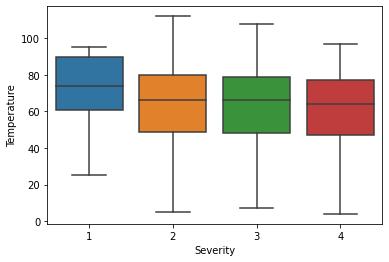

In [92]:
sns.boxplot(x="Severity", y="Temperature", data=df)

<AxesSubplot:xlabel='Severity', ylabel='Weekday'>

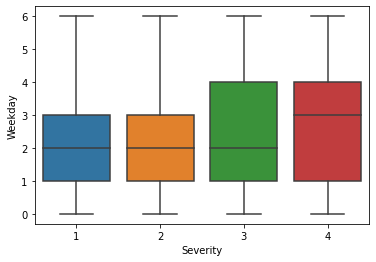

In [93]:
sns.boxplot(x="Severity", y="Weekday", data=df)